# <span style="color:navy"> Numerical Simulation Laboratory
# <span style="color:orange"> Numerical Exercises 05
### <span style="color:black"> Exercise 05.1 </span>

The goal of this exercise was to use the Metropolis Algorithm to sample the spatial distribution of the electron in the Hydrogen athom.  
As it is known the spatial distribution is given by the square modulus of the wavefuncion, which is analitically computable for Hydrogen athom. The main difficulty is therefore to sample this distribution, because it is not possible to use the method of the inversion of the cumulative.  

*The Metropolis Algorithm*  
Given this difficulty, a method to sample any distribution of probability is to use *Metropolis*. In few words it is based on proposing a *move* (in our case is a position in the space) and accept it with a probality based on the ratio of the *old* and the *new* position probabilities. More specifically the *move* is always accepted if the new position probality is higher than the old one, and is accepted with probability $\frac{P_{new}}{P_{old}}$ otherwise.  
In my code the Metropolis Algorithm is realized by the functions *Move()* and *Accept()*; the first one proposes the new position and the second returns a boolean which is *True* if the move is accepted. The first function also comuputes the accumulation of the distance from the origin of the selected position and its squared value, which are useful to compute the value of $\left\langle r \right\rangle$ and its error.

At the beginning of the code is the *Input()* function. It reads the input file and sets the starting values of variable (such as the starting position of electron). In this function there's also a call to the *Equilibrate()* function.

*Equilibration*  
Equilibration is very important in Metropolis. Indeed the proposed move is sampled from some probability distribution, arbitrary chosen. For this reason is necessary avoid the situation where every move is accepted (one may risk not to sample the wanted distribution) or where almost no move is accepted (it makes te code really slower). Therefore one possibility is to adopt the *50% rule* which states that a good choice for the parameters of the distribution are those who give a nearly 50% acceptance rate. This should also make the Metropolis independent from the particular probability distribution choice.  
To achieve the desired rate the *Equilibrate()* function makes a fixed number of moves (in my code it's *eqsteps = 1000*) counting how many proposed move are accepted with a given value for the distribution parameter (I used two different kind of distribution, a uniform one between $\left[x_i-\frac{\delta}{2}, x_i+\frac{\delta}{2}\right]$, and a gaussian with mean $x_i$ and $\sigma$ as a parameter, where $x_i$ is the coordinate of the actual position). Then the position are setted again to starting ones and the acceptance rate is computed. If it is in a reasonable interval near 50% (for me it means  *47% < rate < 53 %*) then the parameter is fixed and the simulation can start; otherwise the parameter is increased by a small quantity and *Equilibrate()* is call again. With this recursive process if increasing in parameter value are small enough (but not too much or it will be long) after some calls of the function a good value for the parameter is found and used for the simulation.



In the exercise it was asked to sample the *1s* *2p* states, which have the following wavefunction:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
but to use cartesian coordinates (which only implies to sample the position *(x, y, z)* and change coordinates to $(r,\theta,\phi)$).  

The expected values for the mean distance from the origin are
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Obviously it is possible to sample every state, if knowing its wavefunction. As an example I implemented the possibility to sample *3d*, whose wavefunction is:
$$
\Psi_{3,2,0}(r,\theta,\phi)=
\frac{a_0^{-7/2}}{81\sqrt{6\pi}} r^2e^{-r/3a_0} (3{\cos^2(\theta)} -1)
$$

Following are the average values (red) of $\left\langle r \right\rangle$ for every state, each shown with the statistical uncertainty (blue) and compared with expected value (orange), as function of blocks.  
I used a total of $M = 10^6$ steps, divided in $N = 1000$ blocks; this choice implies having $L = 1000$ steps per block which should guarantee low correlation between blocks. The correlation could be a problem in Metropolis, because every step is sampled adding a random quantity to the previous coordinate, but large blocks will make it negligible.  

One may see that using different probability distributions does not affect the final result, all values converge to the expected one. The only slight differece is the fact that Gaussian sampling since is peaked in the actual position is a little bit slower in moving to the region with higher probability, and this may affect the value of  $\left\langle r \right\rangle$ in the first blocks.

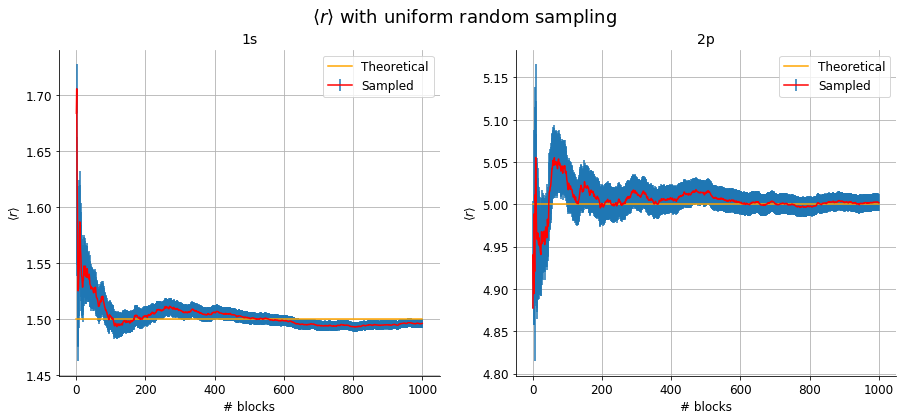

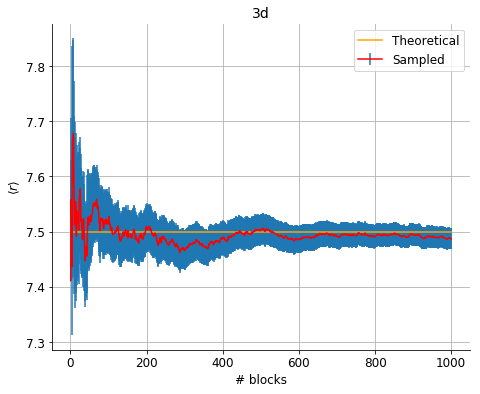

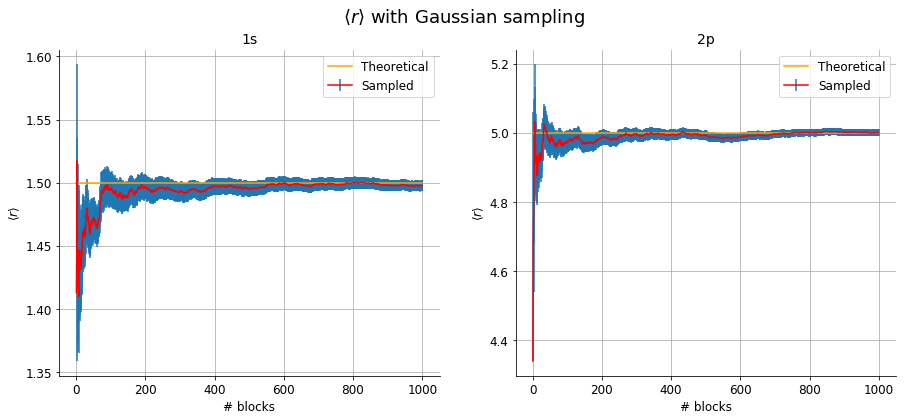

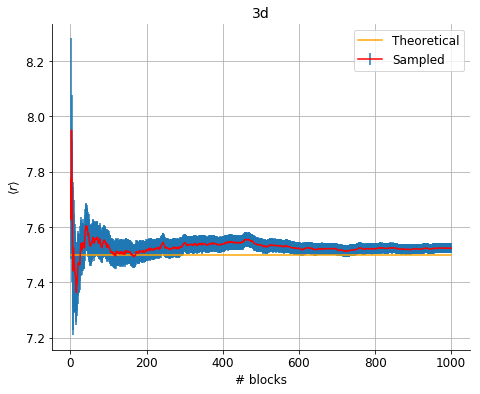

In [1]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, axarr = plt.subplots (1 ,2, figsize=(15,6))
fig.suptitle (r"$\left\langle r \right\rangle$ with uniform random sampling")

#1s
blk, r, err = np.loadtxt ("Metropolis/1s_r.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(blk.size, 1.5)
axarr[0].errorbar (blk, r, yerr=err, c= 'red', ecolor='#1f77b4', label='Sampled')
axarr[0].plot (blk, f, c ='orange', label= 'Theoretical')
axarr[0].set_xlabel ("# blocks")
axarr[0].set_ylabel (r"$\left\langle r \right\rangle$")
axarr[0].set_title ("1s")
axarr[0].grid(True)
axarr[0].legend()

#2p
blk, r, err = np.loadtxt ("Metropolis/2p_r.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(blk.size, 5)
axarr[1].errorbar (blk, r, yerr=err, c= 'red', ecolor='#1f77b4', label='Sampled')
axarr[1].plot (blk, f, c ='orange', label= 'Theoretical')
axarr[1].set_xlabel ("# blocks")
axarr[1].set_ylabel (r"$\left\langle r \right\rangle$")
axarr[1].set_title ("2p")
axarr[1].grid(True)
axarr[1].legend()


plt.figure(figsize=(7.5, 6))

#3d
blk, r, err = np.loadtxt ("Metropolis/3d_r.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(blk.size, 7.5)
plt.errorbar (blk, r, yerr=err, c= 'red', ecolor='#1f77b4', label='Sampled')
plt.plot (blk, f, c ='orange', label= 'Theoretical')
plt.xlabel ("# blocks")
plt.ylabel (r"$\left\langle r \right\rangle$")
plt.title ("3d")
plt.grid(True)
plt.legend()


###################
#Gaussian sampling
###################

fig, axarr = plt.subplots (1 ,2, figsize=(15,6))
fig.suptitle (r"$\left\langle r \right\rangle$ with Gaussian sampling")

#1s
blk, r, err = np.loadtxt ("Metropolis/Gauss_T/1s_r.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(blk.size, 1.5)
axarr[0].errorbar (blk, r, yerr=err, c= 'red', ecolor='#1f77b4', label='Sampled')
axarr[0].plot (blk, f, c ='orange', label= 'Theoretical')
axarr[0].set_xlabel ("# blocks")
axarr[0].set_ylabel (r"$\left\langle r \right\rangle$")
axarr[0].set_title ("1s")
axarr[0].grid(True)
axarr[0].legend()

#2p
blk, r, err = np.loadtxt ("Metropolis/Gauss_T/2p_r.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(blk.size, 5)
axarr[1].errorbar (blk, r, yerr=err, c= 'red', ecolor='#1f77b4', label='Sampled')
axarr[1].plot (blk, f, c ='orange', label= 'Theoretical')
axarr[1].set_xlabel ("# blocks")
axarr[1].set_ylabel (r"$\left\langle r \right\rangle$")
axarr[1].set_title ("2p")
axarr[1].grid(True)
axarr[1].legend()


plt.figure(figsize=(7.5, 6))

#3d
blk, r, err = np.loadtxt ("Metropolis/Gauss_T/3d_r.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(blk.size, 7.5)
plt.errorbar (blk, r, yerr=err, c= 'red', ecolor='#1f77b4', label='Sampled')
plt.plot (blk, f, c ='orange', label= 'Theoretical')
plt.xlabel ("# blocks")
plt.ylabel (r"$\left\langle r \right\rangle$")
plt.title ("3d")
plt.grid(True)
plt.legend()
plt.show()

To be onest there are other input parameters that play an important role in the simulation: the starting coordinates for the point. What I observed in different tentatives is that by starting very far from the origin (or better, by starting in a point with a low probability) may results in difficult equilibration. This is due to the way I wrote the *Equilibrate()* function: if the starting position is in a low probability region it is likely that the proposed move will be accepted (beacuse the probability density decays as an exponential, therefore every move a little nearer the center of probability density results in an accepted move). For this reason the little values for the probability density parameter (let's call it $\delta$) give high acceptance rate and will be refused. Only after some increases of $\delta$ it will have the necessary value to move the position back in the high likely region in few moves and have a reasonable acceptance rate.  
This has two consequences:
- the choice of the starting position may influences the computation time during equilibration and affects also the value of $\delta$
- the average values for the radius will not be reliable for the first blocks as will be correlated to the bad starting position

Following there's an example of this second consequence for 1s and 2p states. The plots shows as before $\left\langle r \right\rangle$ as a function of blocks.

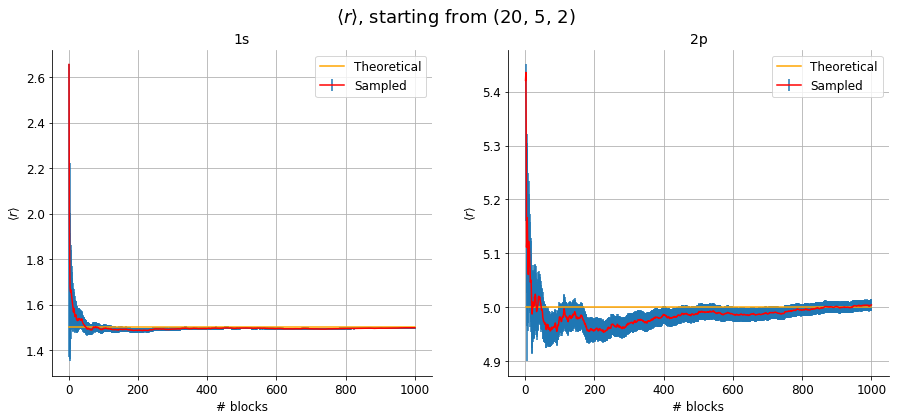

In [2]:
fig, axarr = plt.subplots (1 ,2, figsize=(15,6))
fig.suptitle (r"$\left\langle r \right\rangle$, starting from (20, 5, 2) ")

#1s
blk, r, err = np.loadtxt ("Metropolis/1s_r_farstart.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(blk.size, 1.5)
axarr[0].errorbar (blk, r, yerr=err, c= 'red', ecolor='#1f77b4', label='Sampled')
axarr[0].plot (blk, f, c ='orange', label= 'Theoretical')
axarr[0].set_xlabel ("# blocks")
axarr[0].set_ylabel (r"$\left\langle r \right\rangle$")
axarr[0].set_title ("1s")
axarr[0].grid(True)
axarr[0].legend()

#2p
blk, r, err = np.loadtxt ("Metropolis/2p_r_farstart.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(blk.size, 5)
axarr[1].errorbar (blk, r, yerr=err, c= 'red', ecolor='#1f77b4', label='Sampled')
axarr[1].plot (blk, f, c ='orange', label= 'Theoretical')
axarr[1].set_xlabel ("# blocks")
axarr[1].set_ylabel (r"$\left\langle r \right\rangle$")
axarr[1].set_title ("2p")
axarr[1].grid(True)
axarr[1].legend()

plt.show()

With 3D plots it is possible to show the different sampled positions, in this way one can see what are the usually called *orbitals*.

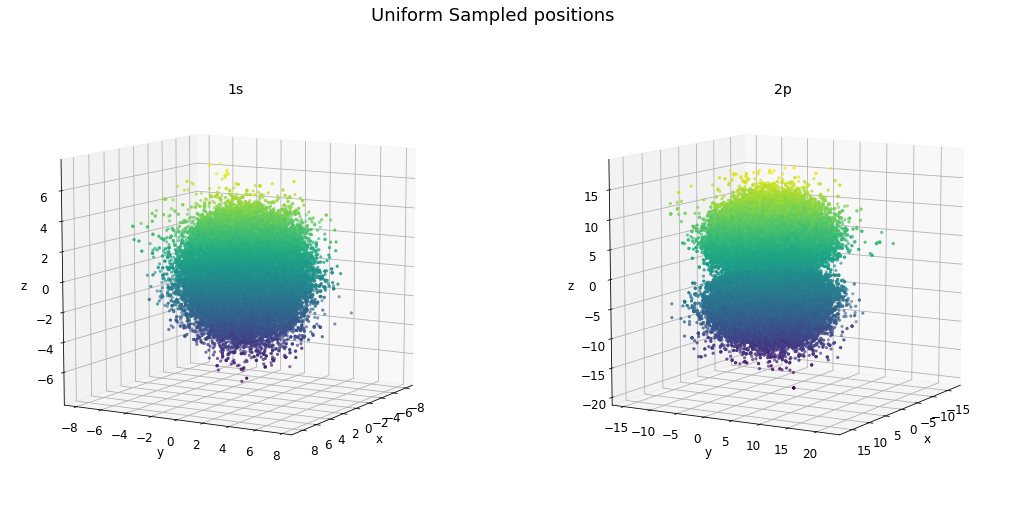

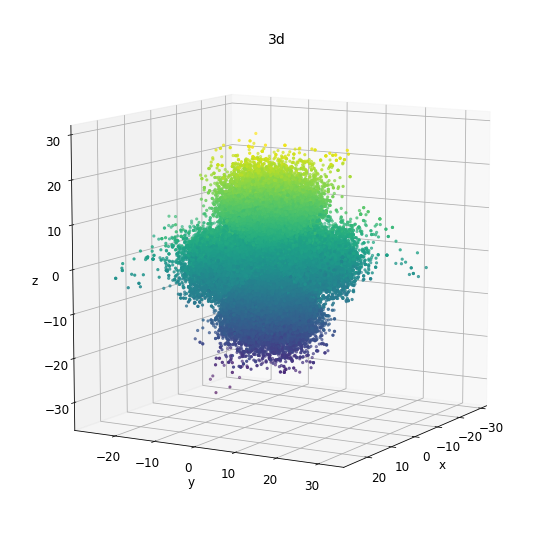

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 8))
fig.suptitle ('Uniform Sampled positions')
X, Y, Z = np.loadtxt("Metropolis/1s_position.out", usecols=(0, 1, 2), delimiter = "\t", unpack = True)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1s')
ax.view_init(10, 30)


X, Y, Z = np.loadtxt("Metropolis/2p_position.out", usecols=(0, 1, 2), delimiter = "\t", unpack = True)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('2p')
ax.view_init(10, 30)


fig = plt.figure(figsize=(7.5, 7.5))
X, Y, Z = np.loadtxt("Metropolis/3d_position.out", usecols=(0, 1, 2), delimiter = "\t", unpack = True)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3d')
ax.view_init(10, 30)

plt.show()

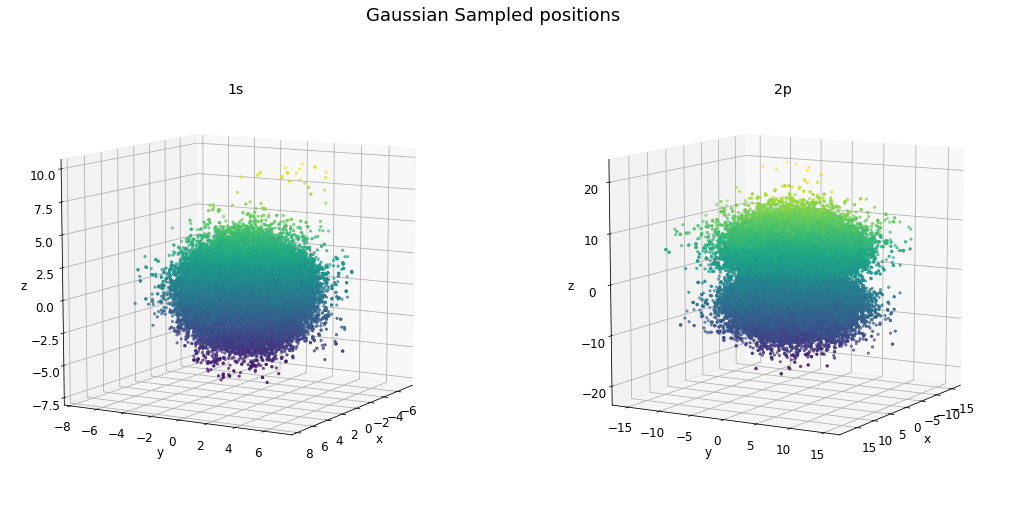

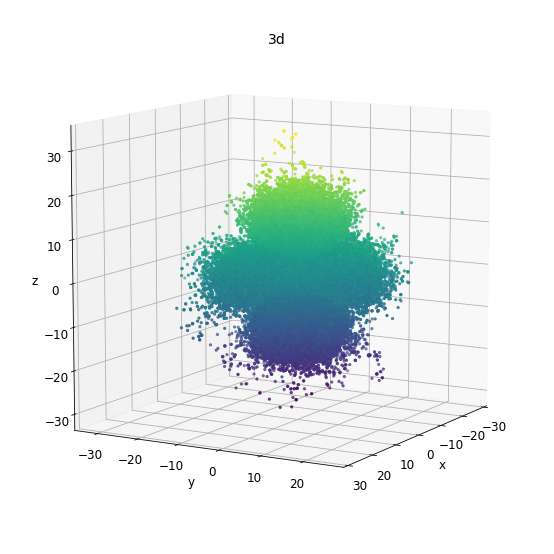

In [4]:
#Gaussian sampling

fig = plt.figure(figsize=(18, 8))
fig.suptitle ('Gaussian Sampled positions')
X, Y, Z = np.loadtxt("Metropolis/Gauss_T/1s_position.out", usecols=(0, 1, 2), delimiter = "\t", unpack = True)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1s')
ax.view_init(10, 30)


X, Y, Z = np.loadtxt("Metropolis/Gauss_T/2p_position.out", usecols=(0, 1, 2), delimiter = "\t", unpack = True)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('2p')
ax.view_init(10, 30)


fig = plt.figure(figsize=(7.5, 7.5))
X, Y, Z = np.loadtxt("Metropolis/Gauss_T/3d_position.out", usecols=(0, 1, 2), delimiter = "\t", unpack = True)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3d')
ax.view_init(10, 30)

plt.show()